# 1 Gráficas e Imágenes

En esta tarea practicarás con las paqueterías de Plots y Images. Aprenderás algunos comandos nuevos (que no vimos en la clase) y desarrollarás tus propias funciones para dibujar tus objetos. 


#  Funciones y gráficas

[1] Haz una función que calcule la posición de una partícula bajo la acción de la gravedad $g = 9.81$, dada la masa (en realidad no es necesaria, pero lo será para un problema más adelante) posición inicial (predefinida $\vec{x} = (0,0)$), el ángulo de la velocidad inicial $\theta$, la magnitud de la velocidad inicial $v$ y el tiempo de vuelo. (no se considera fricción, ni ninguna otra fuerza).

In [5]:
function tiro_parabolico(m, θ, v, t; x0=[0.0,0.0], g=9.81)
    x = x0[1] + v*cos(θ)*t;
    y = x0[2] + v*sin(θ)*t - (1/2)*g*t^2;
    
    return [x,y]
end

tiro_parabolico (generic function with 1 method)

In [6]:
tiro_parabolico(1, π/4, 20, 1.44 )

2-element Array{Float64,1}:
 20.364675298172568
 10.193667298172567

[2] Utilizando la función anterior grafica (utiliza plot(args...)) varios tiros parabólicos manteniendo la misma rapidez inicial, pero cambiando los ángulos. ¿con qué ángulo se llega más lejos (es decir, cuando se encuentre a la misma altura que la inicial? 

**Nota:** En tu gráfica pon los nombres de los ejes y las etiquetas que digan a qué ángulo corresponde (si pudiste instalar LaTeXStrings, pon las etiquetas en LaTeX, no es obligatorio, pero se ve mejor). 

In [7]:
using Plots, LinearAlgebra, LaTeXStrings

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1278


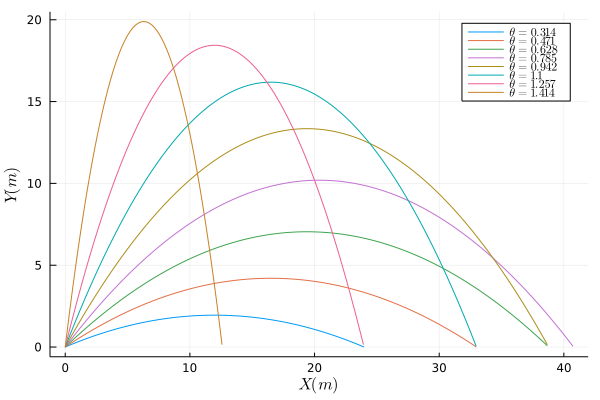

In [8]:
Coordenada_X_Global = [];
Coordenada_Y_Global = [];
Angulos_Global = [];

plot()
for θ in pi/10:pi/20:1.5
    m = 1; #Masa de la partícula
    v = 20; #Magnitud de la velocidad inicial
    t = 0; #Tiempo de vuelo
    P0 = [0.0, 0.0]; #Posición inicial de la partícula
    Angulo_Redondeado = round(θ, digits=3); #Redondeamos el ángulo para que se vea bien en la gráfica
    push!(Angulos_Global, Angulo_Redondeado);
    
    Coordenada_X = [];
    Coordenada_Y = [];

    P_T = [0,0];

    while P_T[2] >= 0
        P_T = tiro_parabolico(m, θ, v, t, x0 = P0)
    
        if P_T[2] >= 0
            push!(Coordenada_X, P_T[1])
            push!(Coordenada_Y, P_T[2])
        end
    
        t += 0.01
    end
    
    push!(Coordenada_X_Global, Coordenada_X);
    push!(Coordenada_Y_Global, Coordenada_Y);
    
    plot!(Coordenada_X, Coordenada_Y, label=L"\theta = %$(Angulo_Redondeado)")
end
plot!(xlabel = L"X (m)", ylabel = L"Y (m)")

el angulo de mayor alcance es theta=0.785, es decir pi/4 o 45°, que es la trayectoria morada.

[3] Utilizando el karg show, haz una animación en tiempo real de varias partículas que se muevan sobre las trayectorias dibujadas en el problema 2. 

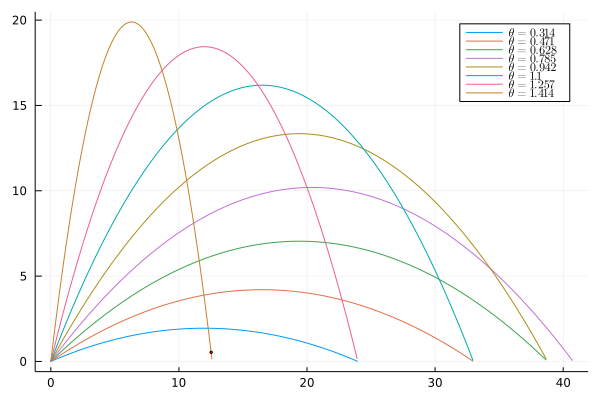

┌ Info: Saved animation to 
│   fn = C:\Users\carlo\Desktop\UNAM\semestre_6\FISICA_COMPUTACIONAL\tmp.gif
└ @ Plots C:\Users\carlo\.julia\packages\Plots\OchXa\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\carlo\\Desktop\\UNAM\\semestre_6\\FISICA_COMPUTACIONAL\\tmp.gif")
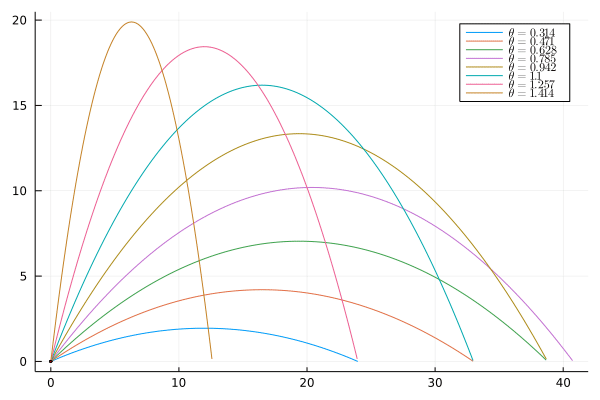

In [9]:
N_Particulas = length(Coordenada_X_Global); #Número de partículas que se lanzaron
N_Posiciones_Max = 0; #Número de posiciones calculadas para el vuelo más largo
Etiquetas = [L"\theta = %$(Angulos_Global[i])" for i in 1:N_Particulas]

for i in Coordenada_X_Global
    N = length(i)
    
    if N > N_Posiciones_Max
        N_Posiciones_Max = N
    end
end

@gif for i in 1:5:N_Posiciones_Max
    plot(Coordenada_X_Global, Coordenada_Y_Global, label = permutedims(Etiquetas))
    for j in 1:N_Particulas
        try
            scatter!(show = :ijulia, [Coordenada_X_Global[j][i]], [Coordenada_Y_Global[j][i]], markersize = 1.5, color = "red", label = "")
        catch
            nothing
        end
    end
end

[4] Ahora haz una función para agregar una fuerza de constricción a tu función del problema 1 de tal forma que 2 partículas se muevan manteniendo la distancia entre ellas y bajo la fuerza de gravedad. La función ahora requiere las dos masas, la posición inicial de ambas partículas, las dos rapideces iniciales y los dos ángulos iniciales y el tiempo de vuelo. (sigue siendo en 2D). 

Hint: Vía las ecuaciones de Hamilton se puede demostrar (casi trivial) que el movimiento de las partículas en 2D (es importante esto de 2D, porque el momento angular deja de ser importante) es el movimiento del centro de masas + el giro a velocidad angular constante de las partículas al rededor del centro de masas. 

In [ ]:
function tiro_parabolico_2_cuerpos(m1,m2,θ1,θ2,v1,v2,t; g=9.81, r10=[0,0], r20=[1,0], M=m1+m2)
    
    #condiciones iniciales:
    #posiciones iniciles paralelas al eje x
    
    cmx0=(m1*r10[1]+m2*r20[1])/M #centro de masa en x; particula 1 a la izquierda
    cmy0=(m1*r10[2]+m2*r20[2])/M #centro de masa en y
    cm0 = [cmx0,cmy0] # arreglo de centro de masa
    
    vcmx0 = (m1*v1*cos(θ1)+m2*v2*cos(θ2))/M # velocidad cm en x
    vcmy0 = (m1*v1*sin(θ1)+m2*v2*sin(θ2))/M # velocidad cm en y
    vcm0 = [vcmx0,vcmy0] #velocidad de arreglo o vector CM
    #------------------------
    
    #movimiento parabolico del CM
    CMy = cm0[2]+vcm0[2]*t-0.5*g*t^2 # posicion en y de cm en tiro parabolico
    CMx = vcm0[1]*t+cm0[1] #posicion en x de cm en tiro parabolico
    CM = [CMx,CMy]
    
    #movimiento de los cuerpos
    r10_cm = norm(cm0-r10)
    r20_cm = norm(cm0-r20)
    
    ω = (v2*sin(θ2)*r20_cm*m2 - v1*sin(θ1)*r10_cm*m1)/(m1*r10_cm^2 + m2*r20_cm^2)
    θ=ω*t
    
    
    
    r1 = CM + r10_cm*[cos(θ+π),sin(θ+π)]
    r2 = CM + r20_cm*[cos(θ),sin(θ)]

    return CM, r1, r2
end

[5] Haz una animación en tiempo real donde simules el movimiento de dos partículas constreñidas a mantener una misma distancia y bajo la acción de un campo gravitatorio (utiliza tu función definida en 4). 

In [ ]:
#definimos parametros
m1= 1
m2= 2
θ1= π/4
θ2 = π/3
v1 = 10
v2 =20
t=0
dt=.02
co_y_CM=0
co_CM_X = []
#co_r1_X = []
#co_r2_X= []

co_CM_Y = []
#co_r1_Y = []
#co_r2_Y = []
r10=[0,0]
r20=[1,0]
CM =[(m1*r10[1]+m2*r20[1])/(m1+m2),(m1*r10[2]+m2*r20[2])/(m1+m2)] #centro de masa en
VCM = [(m1*v1*cos(θ1)+m2*v2*cos(θ2))/(m1+m2),(m1*v1*sin(θ1)+m2*v2*sin(θ2))/(m1+m2)]
vi = norm(VCM)
while co_y_CM >=0
    
    co_CM_N, co_r1_N, co_r2_N = tiro_parabolico_2_cuerpos(m1,m2,θ1,θ2,v1,v2,t)
    
    push!(co_CM_X,co_CM_N[1])
    #push!(co_r1_X,co_r1_N[1])
    #push!(co_r2_X,co_r2_N[1])
    
    push!(co_CM_Y,co_CM_N[2])
    #push!(co_r1_Y,co_r1_N[2])
    #push!(co_r2_Y,co_r2_N[2])
    
    co_y_CM = co_CM_N[2]
    
    t=t+dt
end

plot(co_CM_X, co_CM_Y,label="",ls=:dashdot,xlabel="X[m]",ylabel="Y[m]")
plot!(show = :ijulia,[CM[1],VCM[1]],[CM[2],VCM[2]],label="",color="red",ls=:dot)
scatter!(show = :ijulia, [VCM[1]],[VCM[2]],markershape=:ltriangle, markersize = 5, color = "red", label="Velocidad inicial CM")
t=0
co_y_CM=0
while co_y_CM>=0
   
    co_CM = []
    co_r1 = []
    co_r2 = []
    
    co_CM, co_r1, co_r2 = tiro_parabolico_2_cuerpos(m1,m2,θ1,θ2,v1,v2,t)
        
    #scatter!(show = :ijulia, [co_CM[1]],[co_CM[2]], markersize = 1.5, color = "red", label = "")
    #scatter!(show = :ijulia, [co_r1[1]],[co_r1[2]], markersize = 1.5, color = "green", label = "")
    #scatter!(show = :ijulia, [co_r2[1]],[co_r2[2]], markersize = 1.5, color = "green", label = "")
    plot!(show = :ijulia,[co_r1[1],co_r2[1]],[co_r1[2],co_r2[2]],label="",color="green")
    #d = norm(co_r1 - co_r2)
    #print(d)
    co_y_CM = co_CM[2]
    t=t+dt
end


[6] Generaliza la función del problema 4, para incluir un número arbitrario de partículas, poniendo en arreglos sus masas, en otro sus posiciones iniciales, etc.. 

In [ ]:
######### Función auxiliar para calcular el ángulo polar de un vector en el plano XY
function AngPolar(r)
    if r[1]>0
        return atan(r[2]/r[1])
    else 
        if r[1]<0
            return atan(r[2]/r[1]) + pi
        else
            if r[2]>0
                return pi/2
            else
                if r[2]<0
                    return 3*pi/2
                else
                    return 0
                end
            end
        end
    end
end

In [ ]:
######### Argumentos: 
######### Arreglo de masas (nx1)
######### Arreglo de posiciones iniciales (nx2)
######### Velocidad traslacional inicial. Velocidad inicial del CM (1x2)
######### Velocidad angular inicial, respecto el eje perpendicular del plano graficado XY
function tiro_parabolico_cuerpo_rigido(m,ri,vcm_i,ω,t,completo; g=9.81, M = sum(m),n = length(m))
    CM_i=[]
    for j in 1:n
        push!(CM_i,ri[j]*m[j])
    end
    CM_i = sum(CM_i)/(M)
    print(CM_i)
    CMy = CM_i[2] + vcm_i[2]*t - 0.5*g*t^2 # posicion en y de cm en tiro parabolico
    CMx = CM_i[1] + vcm_i[1]*t  #posicion en x de cm en tiro parabolico
    CM = [CMx,CMy]
    if completo==false
        return CM
    end
    
    rcm_i=[]#### Arreglo de vectores de posiciones respecto CM 
    rcm = []#### Arreglo de distancias a CM
    for j in 1:n
        push!(rcm_i,ri[j]-CM_i)
        push!(rcm,norm(rcm_i[j]))
    end
    θi = []##### Arreglo de ángulos polares iniciales, respecto CM
    θ = []##### Arreglo de ángulos al tiempo t
    r = []##### Arreglo de posiciones al tiempo t
    for j in 1:n
        push!(θi,AngPolar(rcm_i[j]))
        push!(θ,θi[j] + ω*t)
        push!(r,CM+[rcm[j]*cos(θ[j]),rcm[j]*sin(θ[j])])
    end
    return CM , r
end

[7] Dibuja algo "a mano", es decir, poniendo las posiciones de los puntos que dibujan ese algo (no sólo del contorno, también algunos puntos del interior). Cada uno de esos puntos debe tener una masa (puedes pensar en alguna distribución de pasa en particular, o simplemente poner una distribución homogenea). Ahora aplica la función del problema 6 a tu figura para ver el movimiento que sigue. 

In [ ]:
####### Vector de posiciones iniciales:
ri = [[0,0],[0,1],[.5,2],[1,1],[1,0]]
n = length(ri)
rx = []
ry = []
for j in 1:n
    push!(rx,ri[j][1])
    push!(ry,ri[j][2])
end
###### Gráfica
scatter([rx],[ry],markersize = 5, color = "red", label="")
for j in 1:n-1
    plot!([rx[j],rx[j+1]],[ry[j],ry[j+1]],label="",color="green")
end
plot!([rx[n],rx[1]],[ry[n],ry[1]],label="",color="green")

In [ ]:
####### Arreglo de masas
m = [1,1,3,1,1]
####### Velocidad inicial CM 
Vi = [5,10]
####### velocidad angular inicial
ω = 1*pi
###### Gráfica de tiro parabólico

co_CM_X=[]
co_CM_Y=[]
t = 0
dt = 0.2
co_y_CM = 0
while co_y_CM >=0
    co_CM_N=[]
    co_CM_N = tiro_parabolico_cuerpo_rigido(m,ri,Vi,ω,t,false)    
    push!(co_CM_X,co_CM_N[1])
    push!(co_CM_Y,co_CM_N[2])
    co_y_CM = co_CM_N[2]
    t=t+dt
end

plot(show = :ijulia,co_CM_X, co_CM_Y,label="",ls=:dashdot,xlabel="X[m]",ylabel="Y[m]")
t=0
co_y_CM=0

while co_y_CM>=0   
    co_CM = []
    co_r = []
    
    co_CM, co_r = tiro_parabolico_cuerpo_rigido(m,ri,Vi,ω,t,true)
    rx = []
    ry = []
    for j in 1:n
        push!(rx,co_r[j][1])
        push!(ry,co_r[j][2])
    end
    ###### Gráfica
    scatter!([co_CM[1]],[co_CM[2]],markersize = 2, color = "red", label="")
    for j in 1:n-1
        plot!(show = :ijulia,[rx[j],rx[j+1]],[ry[j],ry[j+1]],label="",color="green")
    end
    plot!(show = :ijulia,[rx[n],rx[1]],[ry[n],ry[1]],label="",color="green")
    co_y_CM = co_CM[2]
    t=t+dt
end


Para graficar una curva en 2 y 3D debemos dar las posiciones en $x$, en $y$ y $z$ que queremos graficar. Es decir, debemos dar $x(\alpha)$, $y(\alpha)$, $z(\alpha)$, con $\alpha$ un parámetro. Para graficar una superficie en 3D, debemos de dar dos parámetros. Lo más sencillo es que los dos parámetros sean las coordenadas $x$ y $y$, por lo que $z(x,y)$ es una función de $x$ y $y$. 

Por ejemplo: 

In [ ]:
function z_esfera(x, y)
    try
        return sqrt(100 - x^2 - y^2) # función de una esfera
    catch
        return 0  # cuando se obtienen valores complejos, dibuja el plano xy 
    end
end

plotly()
x = -12:0.1:12 # rango de valores de x
y = -12:0.1:12 # rango de valores de y
surface(x, y, z_esfera) # gráfica de una semi esfera + el plano xy fuera de la esfera. 

[8] Utiliza surface para dibujar un cilindro cuyo eje está en la dirección del eje x (o el plano xy cuando el dibujo esté fuera del cilidro). 

Si tienes instalado Plotly, haslo en esa subpaquetería para que puedas observarlo fácilmente desde todos los ángulos. Nota que para dibujar el cilindro completo necesitarás dos funciones, una para la parte de "abajo" otra para la parte de "arriba".

In [ ]:
function z_pos(x,y)
    try
        return sqrt(25-y^2) # función de un círculo
    catch
        return 0
    end
end

function z_neg(x,y)
    try
        return -sqrt(25-y^2) # función de un círculo
    catch
        return 0
    end
end

plotly()
x = -12:0.1:12 # rango de valores de x
y = -12:0.1:12 # rango de valores de y
surface(x, y, z_pos) # gráfica de la parte superior del cilindro.
surface!(x, y, z_neg) # gráfica de la parte inferior del cilindro.

[9] Ahora, similar al problema 8, haz una gráfica que dibuje un cono cuyo eje sea el eje $z$. Agrega además 3 planos (cortes) que instersecten con el cono de tal forma que la intersección dé (i) una elpise, (ii) una parábola y (iii) una hipérbola. 


In [ ]:
function z_cono(x,y)
    return sqrt(x^2 + y^2)
end

plotly()
x = -20:0.1:20 # rango de valores de x
y = -20:0.1:20 # rango de valores de y
surface(x, y, z_cono, xlims = [-25,25], ylims = [-20,20]) # gráfica de la parte superior del cilindro.

function zp1(x,y)
    return 
end

surface!(xp1, yp1, zp1)b

[10] Haz una función que tenga como argumentos 2 funciones de 2 variables, dos rango de valores ($x$ y $y$) y que lo que regrese sea la gráfica de la intersección (utiliza plot!(args...)). Prueba tu función con el cono *inclinado* (basta con que su eje NO sea paralelo el eje z) y 3 planos (que produzcan una elipse, una parábola y una hipérbola. 

**Nota:** Recuerda, es sumamente improbable que en los valores de $x$ y $y$ que se pongan haya realmente un valor para el cual $f(x,y) = g(x,y)$, con $f$ y $g$ las funciones de las superficies. Sin embargo, se puede considerar que en entre 2 superficies continuas, habrá intersección si $sign(f(x_1,y_1)-g(x_1,y_1))$ es diferente de $sign(f(x_2,y_2)-g(x_2,y_2))$, donde $x_2 \approx x_1$ y $y_2 \approx y_1$. Aquí con $\approx$ quiero decir que diferen a lo más por un $\delta$ (donde $\delta$ es el espacio entre cada valor del rango). 

**Hint:** para poder graficar los puntos de tu intersección usando plot(args...), es posible que necesites utilizar sortperm. Dejo abajo un ejemplo:

# Objetos y gráficas

[11] Utilizando tus objetos geométricos (segmento y polígono), haz una función (modificando plot) que grafique el objeto geométrico correspondiente. Incluye karguments alpha, linewidth, markersize, label, fill y color en tu función. 

**Nota:** Antes de hacer tu función prueba qué hace el karg fill en gráficas 2D: plot(X,Y, fill = true) y plot(X,Y, fill = false). 

In [ ]:
using Plots, LinearAlgebra

In [4]:
abstract type ObjetosGeometricos  end
mutable struct Segmento <: ObjetosGeometricos
    punto_inicial::Array
    punto_final::Array
    longitud::Real
end
mutable struct Poligono <: ObjetosGeometricos
    Vertices::Array
    lado::Segmento
    numero_de_lados::Integer  
end

In [ ]:
function Poligono(vertices::Array)
    numero_de_lados=length(vertices)
   for i ∈ 1:numero_de_lados
        j = i+1 
        if j <= numero_de_lados
            lado = Segmento(vertices[i],vertices[j])
        else
            lado = Segmento(vertices[i], vertices[1])
            return Poligono(vertices, lado , numero_de_lados) #Sólo presenta el último segmento
        end  
    end
end

function Segmento(punto_inicial::Array, punto_final::Array)
    return Segmento(punto_inicial,punto_final,norm(punto_inicial-punto_final))
end

In [ ]:
function mi_plot(og::ObjetosGeometricos;alpha=1,linewidth=2, markersize=4, label="", fill=true,color="black")
    vertices = og.Vertices
    xx = []
    yy= []
    n = length(vertices)
    
    for vertice in vertices
        push!(xx,vertice[1])
        push!(yy,vertice[2])
    end
    #grafica
    scatter(xx,yy,color="Blue",label=false)
    plot!(xx,yy,color="Red",label=false)
    plot!([xx[n],xx[1]], [yy[n],yy[1]], color="Red",label=false)#grafica el ultimo segmento del elemnto n al 1

end

In [ ]:
cuadrado = Poligono([[0,0],[0,1],[1,1],[1,0]])

In [ ]:
mi_plot(cuadrado)

Los siguientes problemas **son difíciles**, por lo que **sólo debes elegir uno de ellos** y contará como 5 problemas:

elegí el muñeco animado, los demas los borre para que no haya saturacion de info.

[reto] Animando un muñeco: La idea es hacer una función que genere sola la animación de un muñeco que se mueve "naturalmente" caminando en 2D. 

Haz un conjunto de objetos que sean partes del cuerpo de un muñeco "sencillo", cabeza, brazos, torzo, piernas. La cabeza es un círculo (si te quieres lucir, una elipse), los brazos son 2 segmentos igual que las piernas, el torzo es sólo un segmento.  

Haz un objeto que se llame cuerpo, que incluya, 1 cabeza, 2 brazos, un torzo y 2 piernas. 

Haz una función que dados los tamaños de los segmentos para cada pieza del cuerpo, el radio de la cabeza, los ángulos para inclinar los brazos (dos por cada brazo), las piernas (dos por cada pierna) y el torzo, construlla el objeto cuerpo correctamente (es decir que realmente la cabeza esté unida al inicio del torzo, los brazos estén unidos también al torzo (por ejemplo a 10% del camino), y las piernas estén unidas al final del torzo. 

Finalmente haz una función (importando la función plot de Plots) que dado un cuerpo y una velocidad (hacia adelante o hacia atrás), anime el cuerpo caminando correctamente (es decir, que se vean las brazadas y pasos naturales, con sus respectivas flexiones). 

**Nota:** Este ejercicio NO sólo requiere de habilidad computacional o matemática, sino también de creatividad y una capacidad para proponer un modelo del movimiento del cuerpo. Es decir, es un problema bastante libre, no hay "una respuesta correcta". 

In [ ]:
abstract type Humano end

struct Cabeza <: Humano
    radio::Real
end

struct Brazo <: Humano
    biceps::Real
    antebrazo::Real
end

struct Torso <: Humano
    longitud::Real
end

struct Pierna <: Humano
    muslo::Real
    pantorrilla::Real
end

In [ ]:
function monito(R_C, L_B, L_A, L_T, L_M, L_P, θ_B_I, θ_A_I, θ_B_D, θ_A_D, θ_M_I, θ_P_I, θ_M_D, θ_P_D, θ_T)
     plot(xlimit = [-5,5])
    #Generamos los objetos con los que vamos a construir a nuestro personaje.
    C = Cabeza(R_C);
    B_I = Brazo(L_B, L_A);
    B_D = Brazo(L_B, L_A);
    T = Torso(L_T);
    P_I = Pierna(L_M, L_P);
    P_D = Pierna(L_M, L_P);
    
    #Graficamos la cabeza
    x_cabeza = [C.radio*cos(θ) for θ in 0:2π/250:2π]
    y_cabeza = [C.radio*sin(θ) for θ in 0:2π/250:2π]
    plot!(x_cabeza, y_cabeza, aspect_ratio = 1, label = "", color = "black")
    
    #Graficamos el torso
    Parte_Superior_X = 0
    Parte_Superior_Y = -C.radio
    Parte_Inferior_X = 0
    Parte_Inferior_Y = Parte_Superior_Y - T.longitud
    plot!([Parte_Superior_X, Parte_Inferior_X], [Parte_Superior_Y, Parte_Inferior_Y], label = "", color = "black")
    
    #Graficamos el brazo izquierdo
    #Parte I: Bicep
    Bicep_Superior_X = 0
    Bicep_Superior_Y = Parte_Superior_Y - 0.1*T.longitud
    Bicep_Inferior_X = -B_I.biceps*sin(θ_B_I)
    Bicep_Inferior_Y = Bicep_Superior_Y - B_I.biceps*cos(θ_B_I)
    plot!([Bicep_Superior_X, Bicep_Inferior_X], [Bicep_Superior_Y, Bicep_Inferior_Y], label = "", color = "black")
    #Parte II: Antebrazo
    Antebrazo_Superior_X = Bicep_Inferior_X
    Antebrazo_Superior_Y = Bicep_Inferior_Y
    Antebrazo_Inferior_X = Antebrazo_Superior_X + B_I.antebrazo*sin(θ_A_I)
    Antebrazo_Inferior_Y = Antebrazo_Superior_Y - B_I.antebrazo*cos(θ_A_I)
    plot!([Antebrazo_Superior_X, Antebrazo_Inferior_X], [Antebrazo_Superior_Y, Antebrazo_Inferior_Y], label = "", color = "black")
    
    #Graficamos el brazo derecho
    #Parte I: Bicep
    Bicep_Superior_X_D = 0
    Bicep_Superior_Y_D = Parte_Superior_Y - 0.1*T.longitud
    Bicep_Inferior_X_D = B_D.biceps*sin(θ_B_D)
    Bicep_Inferior_Y_D = Bicep_Superior_Y_D - B_D.biceps*cos(θ_B_D)
    plot!([Bicep_Superior_X_D, Bicep_Inferior_X_D], [Bicep_Superior_Y_D, Bicep_Inferior_Y_D], label = "", color = "black")
    #Parte II: Antebrazo
    Antebrazo_Superior_X_D = Bicep_Inferior_X_D
    Antebrazo_Superior_Y_D = Bicep_Inferior_Y_D
    Antebrazo_Inferior_X_D = Antebrazo_Superior_X_D + B_D.antebrazo*sin(θ_A_D)
    Antebrazo_Inferior_Y_D = Antebrazo_Superior_Y_D - B_D.antebrazo*cos(θ_A_D)
    plot!([Antebrazo_Superior_X_D, Antebrazo_Inferior_X_D], [Antebrazo_Superior_Y_D, Antebrazo_Inferior_Y_D], label = "", color = "black")
#--------------------------------------------------------
     #Graficamos la pierna izquierda
    #Parte I: muslo
    pierna_Superior_X = 0
    pierna_Superior_Y = Parte_Superior_Y - T.longitud
    pierna_Inferior_X = -P_I.muslo*sin(θ_M_I)
    pierna_Inferior_Y = pierna_Superior_Y - P_I.muslo*cos(θ_M_I)
    plot!([pierna_Superior_X, pierna_Inferior_X], [pierna_Superior_Y, pierna_Inferior_Y], label = "", color = "black")
    #Parte II: pantorrilla
   pantorrilla_Superior_X = pierna_Inferior_X
    pantorrilla_Superior_Y = pierna_Inferior_Y
    pantorrilla_Inferior_X = pantorrilla_Superior_X + P_I.pantorrilla*sin(θ_P_I)
    pantorrilla_Inferior_Y = pantorrilla_Superior_Y - P_I.pantorrilla*cos(θ_P_I)
    plot!([pantorrilla_Superior_X, pantorrilla_Inferior_X], [pantorrilla_Superior_Y, pantorrilla_Inferior_Y], label = "", color = "black")
    
     #Graficamos la pierna derecha
    #Parte I: muslo
    pierna_Superior_XD = 0
    pierna_Superior_YD = Parte_Superior_Y - T.longitud
    pierna_Inferior_XD = P_D.muslo*sin(θ_M_D)
    pierna_Inferior_YD = pierna_Superior_YD - P_D.muslo*cos(θ_M_D)
    plot!([pierna_Superior_XD, pierna_Inferior_XD], [pierna_Superior_YD, pierna_Inferior_YD], label = "", color = "black")
    #Parte II: pantorrilla
   pantorrilla_Superior_XD = pierna_Inferior_XD
    pantorrilla_Superior_YD = pierna_Inferior_YD
    pantorrilla_Inferior_XD = pantorrilla_Superior_XD + P_D.pantorrilla*sin(θ_P_D)
    pantorrilla_Inferior_YD = pantorrilla_Superior_YD + P_D.pantorrilla*cos(θ_P_D)
    plot!([pantorrilla_Superior_XD, pantorrilla_Inferior_XD], [pantorrilla_Superior_YD, pantorrilla_Inferior_YD], label = "", color = "black"., axis = false)
    

end

In [ ]:
R_C = 0.5
L_B = 1.5
L_A = 0.8
L_T = 3
L_M = 1.75
L_P = 1
θ_B_I = pi/4
θ_A_I = -pi/3
θ_B_D = pi/2
θ_A_D = -pi/3
θ_M_I = pi/5
θ_P_I = pi/10000
θ_M_D = pi/5
θ_P_D = 2*pi/3
θ_T = pi/2

plot()
monito(R_C, L_B, L_A, L_T, L_M, L_P, θ_B_I, θ_A_I, θ_B_D, θ_A_D, θ_M_I, θ_P_I, θ_M_D, θ_P_D, θ_T)

In [ ]:
θ_B_I = -pi/4:pi/20:pi/4;
θ_A_I = -pi/2:pi/20:0;
θ_B_D = -pi/4:pi/20:pi/4;
θ_A_D = -pi/2:pi/20:0;
θ_M_I = -pi/5:pi/25:pi/5;
θ_P_I = 0:pi/9970:pi/100;
θ_M_D = -pi/5:pi/25:pi/5;
θ_P_D = pi/2:pi/18:pi;

Animacion = @animate for i in 1:10
    monito(R_C, L_B, L_A, L_T, L_M, L_P, θ_B_I[i], θ_A_I[i], θ_B_D[i], θ_A_D[i], θ_M_I[i], θ_P_I[i], θ_M_D[i], θ_P_D[i], θ_T)
end

In [ ]:
velocidad = 30

gif(Animacion, fps=velocidad)

# Images

En los siguientes ejercicios haremos el fractal de Julia y Mandelbrot.

[17] Considera el mapeo cuadrático $z_n = z_{n-1}^2 + c$, donde $z_n$ y $c$ son números complejos. Demuestra que el mapeo no converge si $|z_n|>2$ para algún valor de $n$. 

R: $\\$
caso 1: $|c| \leq 2$. Ahora, $\left|z_{n+1}\right| \geq\left|z_{n}\right|^{2}-|c|>2\left|z_{n}\right|-2$. re-escribiendo
$$
\left|z_{n+1}\right|-2>2\left(\left|z_{n}\right|-2\right)
$$
vemos que $\left|z_{n}\right|-2$ tiende a infinito.

caso 2: 
$|c|>2$. $\\$ veamos que $\left|z_{1}\right|=\left|c^{2}+c\right| \geq|c|^{2}-|c|>|c|$. entonces para las subsecuentes iteraciones, se tiene que:
$$
\left|z_{n+1}\right| \geq\left|z_{n}\right|^{2}-|c| \geq|c|\left|z_{n}\right|-|c| \geq\left|z_{n}\right|+(|c|-1)\left|z_{n}\right|-|c|>\left|z_{n}\right|+(|c|-1)|c|-|c|
$$
notemos que aqui $(|c|-1)|c|-|c|$ es una constante positiva. Ahora, por induccion la desigualdad $\left|z_{n}\right|>|c|$ sigue funcionando y la diferencia $\left|z_{n+1}\right|-\left|z_{n}\right|$ esta acotada por debajo. por tanto, $\left|z_{n}\right| \rightarrow \infty$


[18] Haz una función que dado $c$, $z_0$ y $n$ arroje $true$ y $|z_n|$ si ningún valor de $|z_i|$ con $i\le n$ es mayor que 2 y false y $n-i+1$ si $|z_i|$ es el primer valor mayor que 2. Si arroja false significa que la sucesión no converge. Si arroja true significa que "posiblemente" converje. $n-i+1$ es a cuantos pasos quedó de "considerar que sí convergiera". Es una medida qué tan lento se sale de la convergencia. $|z_n|$ en el caso de que se considere que converja, es aproximadamente a qué valor converge. 

In [ ]:
function Mandelbrot(c::Complex{Float64},z0::Complex{Float64},n::Int64)
    z = z0
    for i in 1:n
        z = z^2+c
        if abs(z)>2
            return n-i+1, false
        end
    end
    return abs(z), true
end


[19] Fractal de Mandelbrot. Los números complejos se pueden expresar en el plano (plano complejo), donde la parte imaginaria es el eje $y$ y la parte real es el  eje $x$. Considera $z_0 = 0$. Queremos saber qué valores de $c$ forman una suscesión que converge. Utilizando la paquetería Images (y el truco para convertir coordenadas en pixeles), haz una función que dibuje en negro todos los valores de $c$ que "convergen" (para n = 100, por ejemplo) y en una escala de colores basada en $n-i+1$, que sea más oscura entre más cerca esté de $0$ que dibuje los puntos que no convergen. 

**Nota:** Una imagen de $1600\times 1600$ es bastante razonable (no sobre pases los 20Mpx). Y recuerda que como $z_1 = c$, $|c|<2$ (un $|c|>2$ sabemos que generará una suscesión que no converge), por lo tanto el máximo en los límites que vale la pena dibujar es el $-2<x<2$ y $-2<y<2$ (lo que llamé cajax y cajay en el video tendrían que ser $[-2,2]$ y $[-2,2]$). Para los colores, ver Nota2 del siguiente ejercicio. 

In [ ]:
using Pkg
Pkg.add("Images")
Pkg.add("ImageIO")
Pkg.add("ImageView")
Pkg.add("ColorSchemes") 
Pkg.add("FileIO")
Pkg.add("ImageMagick")

In [ ]:
using Images, ImageView, ImageIO, ImageMagick

In [ ]:
function ManC(c::Complex{Float64},n::Int64)
    z = 0+0im
    for i in 1:n
        z = z^2+c
        if abs(z)>2
            return (n-i+1)/n
        end
    end
    return 0
end


In [ ]:
L = 1600
n=100
Imagen = [RGB(0,0,0) for i in 1:L, j in 1:L];
for i in 1:L
    for j in 1:L
        if i==ceil(L/2)||j == ceil(L/2)
            Imagen[j,i]=RGB(0,1,0)
        elseif i%ceil(L/40)==0 && ceil(L/2)-L/200<j<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        elseif j%ceil(L/40)==0 && ceil(L/2)-L/200<i<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        else
            Imagen[j,i]=RGB(ManC((-2+4*i/L) + (2-4*j/L)im,n)^2,ManC((-2+4*i/L) + (2-4*j/L)im,n)^3,ManC((-2+4*i/L) + (2-4*j/L)im,n)^4)
    
        end
    end
end
Imagen

[20] Fractal de Julia (el que puse en el video). Elige algún valor de $c$ que corresponda a las zonas "negras" del fractal de Mandelbrot. Entre más cercano a la frontera (sin estar sobre la frontera) mejor. El problema es casi idéntico al anterior, excepto que ahora lo que graficarás son los valores de $z_0$ (en vez de los valores de $c$) con los que la sucesión converge. 

Intenta graficar 3 versiones, (i) los que convergen sean negros y los que no que tengan un color dependiendo de $n-i+1$. (ii) Que los que no convergen sean negros y los que convergen tengan un color dependiendo de $|z_n|$. (iii) Que todos todos tengan un color, dependiendo de $n-i+1$ en el caso de los que no convergen y de $|z_n|$ en el caso de los que sí convergen. 

**Nota:** Te recomiendo jugar con tu programa y ver cómo se ve con diferentes valores de $n$ y con diferentes valores de $c$. Por supuesto eso no lo podemos calificar, pero seguramente vas a disfrutarlo y te va a interesar leer sobre el fractal de Julia (y su interesante historia). 

**Nota2:** Como sugerencia de colores, normaliza $n-i+1$ de tal forma que pueda tener valores entre 0 y 1, lo mismo para $|z_n|$ (es decir, divide entre $n$ y entre 2 respectivamente). Con la versión normalizada puedes hacer una ecuación lineal para el rojo, una cuadrática para el verde y una cúbica para el azul (las 3 funciones que vayan de 0 a 1 si su dominio es el intervalo [0,1]). 

In [ ]:
function ManZ1(z::Complex{Float64},n::Int64)
    c = -1.3 + 0.005im
    for i in 1:n
        z = z^2+c
        if abs(z)>2
            return (n-i+1)/n
        end
    end
    return 0
end


In [ ]:
L = 1600
n=100
Imagen = [RGB(0,0,0) for i in 1:L, j in 1:L];
for i in 1:L
    for j in 1:L
        if i==ceil(L/2)||j == ceil(L/2)
            Imagen[j,i]=RGB(0,1,0)
        elseif i%ceil(L/40)==0 && ceil(L/2)-L/200<j<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        elseif j%ceil(L/40)==0 && ceil(L/2)-L/200<i<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        else
            Imagen[j,i]=RGB(ManZ1((-2+4*i/L) + (2-4*j/L)im,n)^2,ManZ1((-2+4*i/L) + (2-4*j/L)im,n)^3,ManZ1((-2+4*i/L) + (2-4*j/L)im,n)^4)
    
        end
    end
end
Imagen

In [ ]:
function ManZ2(z::Complex{Float64},n::Int64)
    c = -1.3 + 0.005im
    for i in 1:n
        z = z^2+c
        if abs(z)>2
            return 0
        end
    end
    return abs(z)/2
end

In [ ]:
L = 1600
n=100
Imagen = [RGB(0,0,0) for i in 1:L, j in 1:L];
for i in 1:L
    for j in 1:L
        if i==ceil(L/2)||j == ceil(L/2)
            Imagen[j,i]=RGB(0,1,0)
        elseif i%ceil(L/40)==0 && ceil(L/2)-L/200<j<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        elseif j%ceil(L/40)==0 && ceil(L/2)-L/200<i<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        else
            Imagen[j,i]=RGB(ManZ2((-2+4*i/L) + (2-4*j/L)im,n),ManZ2((-2+4*i/L) + (2-4*j/L)im,n),ManZ2((-2+4*i/L) + (2-4*j/L)im,n))
    
        end
    end
end
Imagen

In [ ]:
function ManZ3(z::Complex{Float64},n::Int64)
    c = -1.3 + 0.005im
    for i in 1:n
        z = z^2+c
        if abs(z)>2
            return (0, (n-i+1)/n)
        end
    end
    return (abs(z)/2,0)
end

In [ ]:
L = 1600
n=100
Imagen = [RGB(0,0,0) for i in 1:L, j in 1:L];
for i in 1:L
    for j in 1:L
        if i==ceil(L/2)||j == ceil(L/2)
            Imagen[j,i]=RGB(0,1,0)
        elseif i%ceil(L/40)==0 && ceil(L/2)-L/200<j<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        elseif j%ceil(L/40)==0 && ceil(L/2)-L/200<i<ceil(L/2)+L/200
            Imagen[j,i]=RGB(0,1,0)
        else
            Imagen[j,i]=RGB(ManZ3((-2+4*i/L) + (2-4*j/L)im,n)[1],(ManZ3((-2+4*i/L) + (2-4*j/L)im,n)[2])^4,(ManZ3((-2+4*i/L) + (2-4*j/L)im,n)[2]))    
        end
    end
end
Imagen